In [1]:
import numpy as np



In [2]:
class Perceptron:
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state=1):
        
        #eta is the learning rate. Same as step size. It is the increment at which new weights are updated.  
        #eta is a number between 0 and 1, and is like a percentage of the error. The absolute value of the percent 
        #error is the actual increment size
        
        
        #n_iter is the number of times the algorithm/updating of weights will happen
        
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        
        #X are the independent variables
        #y is the dependent variable
        
        
        #rgen is for setting a random state
        rgen = np.random.RandomState(self.random_state) 
        
        #initially, the weights are numbers picked from a normal distrinution
        #.shape[1] -> number of columns
        #we want random values for our weights initially. If we have same values, then the change in value of all 
        #weights would be the same, which may not be true for our case
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1]) 
        
        #initializing the bias as 0
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update*xi
                self.b_ += update
                errors += int(update != 0.0)
            
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
b = np.array([[1,2,4,3], [1,2,3,4], [1,2,3,4]])

b.shape[1]

4

In [4]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')


In [5]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


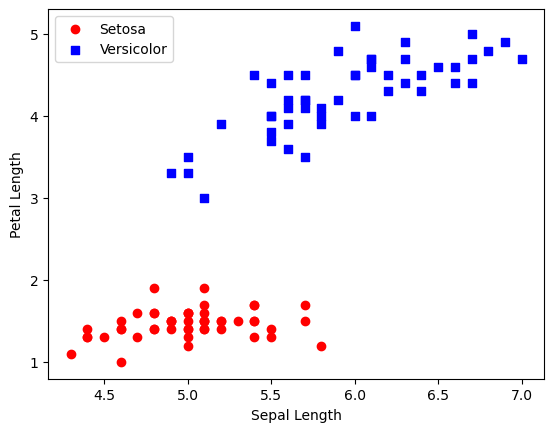

In [6]:
import matplotlib.pyplot as plt

#Extracting the first 100 values of the column 4. .values converts df into numpy
y = df.iloc[0:100, 4].values

#Initializing Iris-setosa as 0, and the other one as 1
y = np.where(y == 'Iris-setosa', 0 ,1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc = 'upper left')
plt.show()

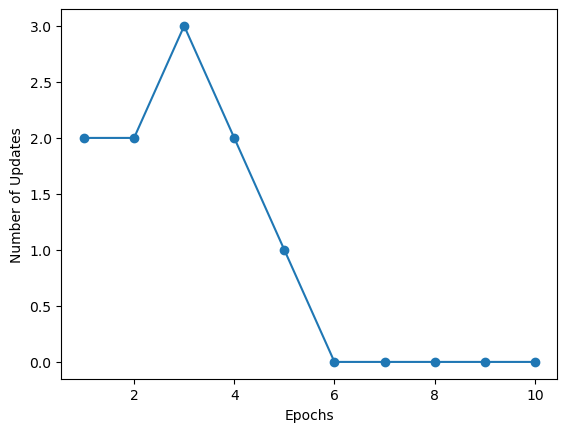

In [7]:
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker = 'o')

plt.xlabel('Epochs')
plt.ylabel('Number of Updates')
plt.show()

In [8]:
#After the 6 epochs, no more updates were done, ie, we found the 'correct' weights after 6 iterations. 
#y-axis -> the number of updates done. ie, first 2 iterations, 2 of the weights were changed, 3rd iteration, 3 weights
#changed, 4th iteration, 2 weights changes, 5th iteration, 1 weight changed.

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min = X[:, 0].min() - 1
    x1_max = X[:, 0].max() + 1
    
    x2_min = X[:, 1].min() - 1
    x2_max = X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

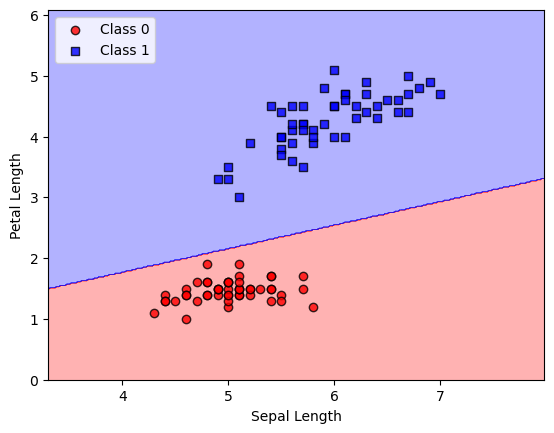

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc = 'upper left')
plt.show()

In [22]:
class adalineGD:
    
    def __init__(self, eta = 0.1, n_iter = 25, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        #X is a Nx2 matrix.
        rgen = np.random.RandomState(self.random_state)
        
        #Random weights in the begining
        #X.shape[1] -> number of columns. So, w_ is 2x1 matrix/vector
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        
        
        #Setting bias as 0
        self.b_ = np.float_(0.)
        
        # Setting up an empty list that records total loss of each iteration
        self.losses_ = []
        
        for i in range(self.n_iter):
            
            #output is y = X*weights + b
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            #X.shape[0] is number of rows. X.T.dot(errors)/X.shape[0], is transpose of the X, multiplied by errors
            # and then divided by number of rows. 2xN * Nx1 = 2*1
            self.w_ += self.eta * 2.0 * X.T.dot(errors)/X.shape[0]
            
            #
            self.b_ += self.eta * 2.0 * errors.mean()
            
            #Appending the loss. The loss is squared, to take care of the direction, ie negative/positive.
            loss = (errors**2).mean()
            self.losses_.append(loss)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

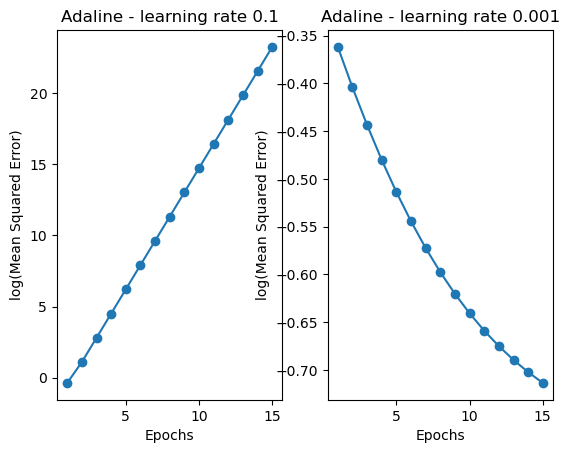

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

ada1 = adalineGD(eta = 0.1, n_iter = 15).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
           np.log10(ada1.losses_), marker = 'o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean Squared Error)')
ax[0].set_title('Adaline - learning rate 0.1')

ada2 = adalineGD(n_iter = 15, eta = 0.001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
           np.log10(ada2.losses_), marker = 'o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean Squared Error)')
ax[1].set_title('Adaline - learning rate 0.001')

plt.show()

In [49]:
#Standardizing the X.

X_std = np.copy(X)


X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

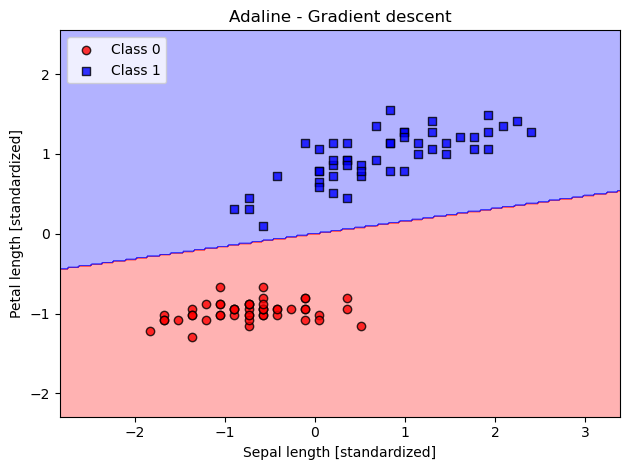

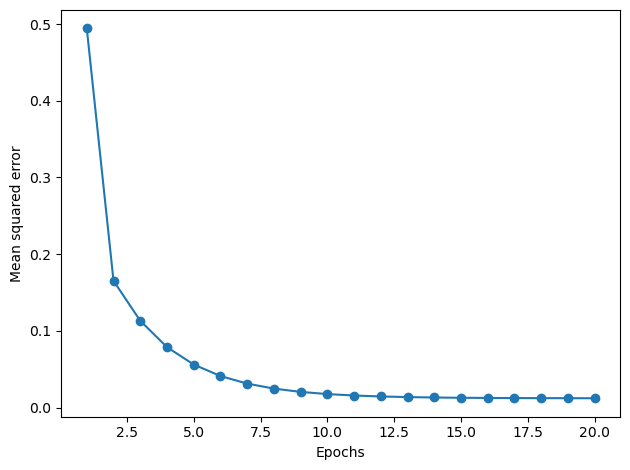

In [51]:
ada_gd = adalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1),
         ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In [ ]:
# In normal gradient descent, we calculate the errors for each observation and use the sum to update the weights

# In stochastic gradient, the error of A observation is calculated, and then the weights are updated, and then 
# we move to a new observation.

In [59]:
class AdalineSGD:
        
    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses) 
            self.losses_.append(avg_loss)
        
        return self
    
    def partial_fit(self, X, y):
        
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        
        else:
            self._update_weights(X, y)
        
        return self
    
    def _shuffle(self, X, y):
        
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                                   size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.5, 1, 0)

In [58]:
_shuffle(X)

NameError: name '_shuffle' is not defined